In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("cardekho_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
df.shape

(15411, 14)

In [8]:
df.drop('Unnamed: 0',axis = 1 , inplace=True)

In [9]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [10]:
df.shape

(15411, 13)

In [11]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [13]:
print(df['seller_type'].dtype!='O')
print(df['max_power'].dtype!='O')

False
True


In [14]:
# differentiating numerical and categorical column 
num = [f for f in df.columns if df[f].dtype !='O']
cat = [f for f in df.columns if df[f].dtype =='O']

print('num features {} : {} '.format(len(num),num))
print('cat features {} : {} '.format(len(cat),cat))

num features 7 : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'] 
cat features 6 : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type'] 


In [15]:
#counting data on categorical columns

In [16]:
for col in cat:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------------')
          
           

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
-----------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.12

In [17]:
# numerical features analysis 
import seaborn as sns

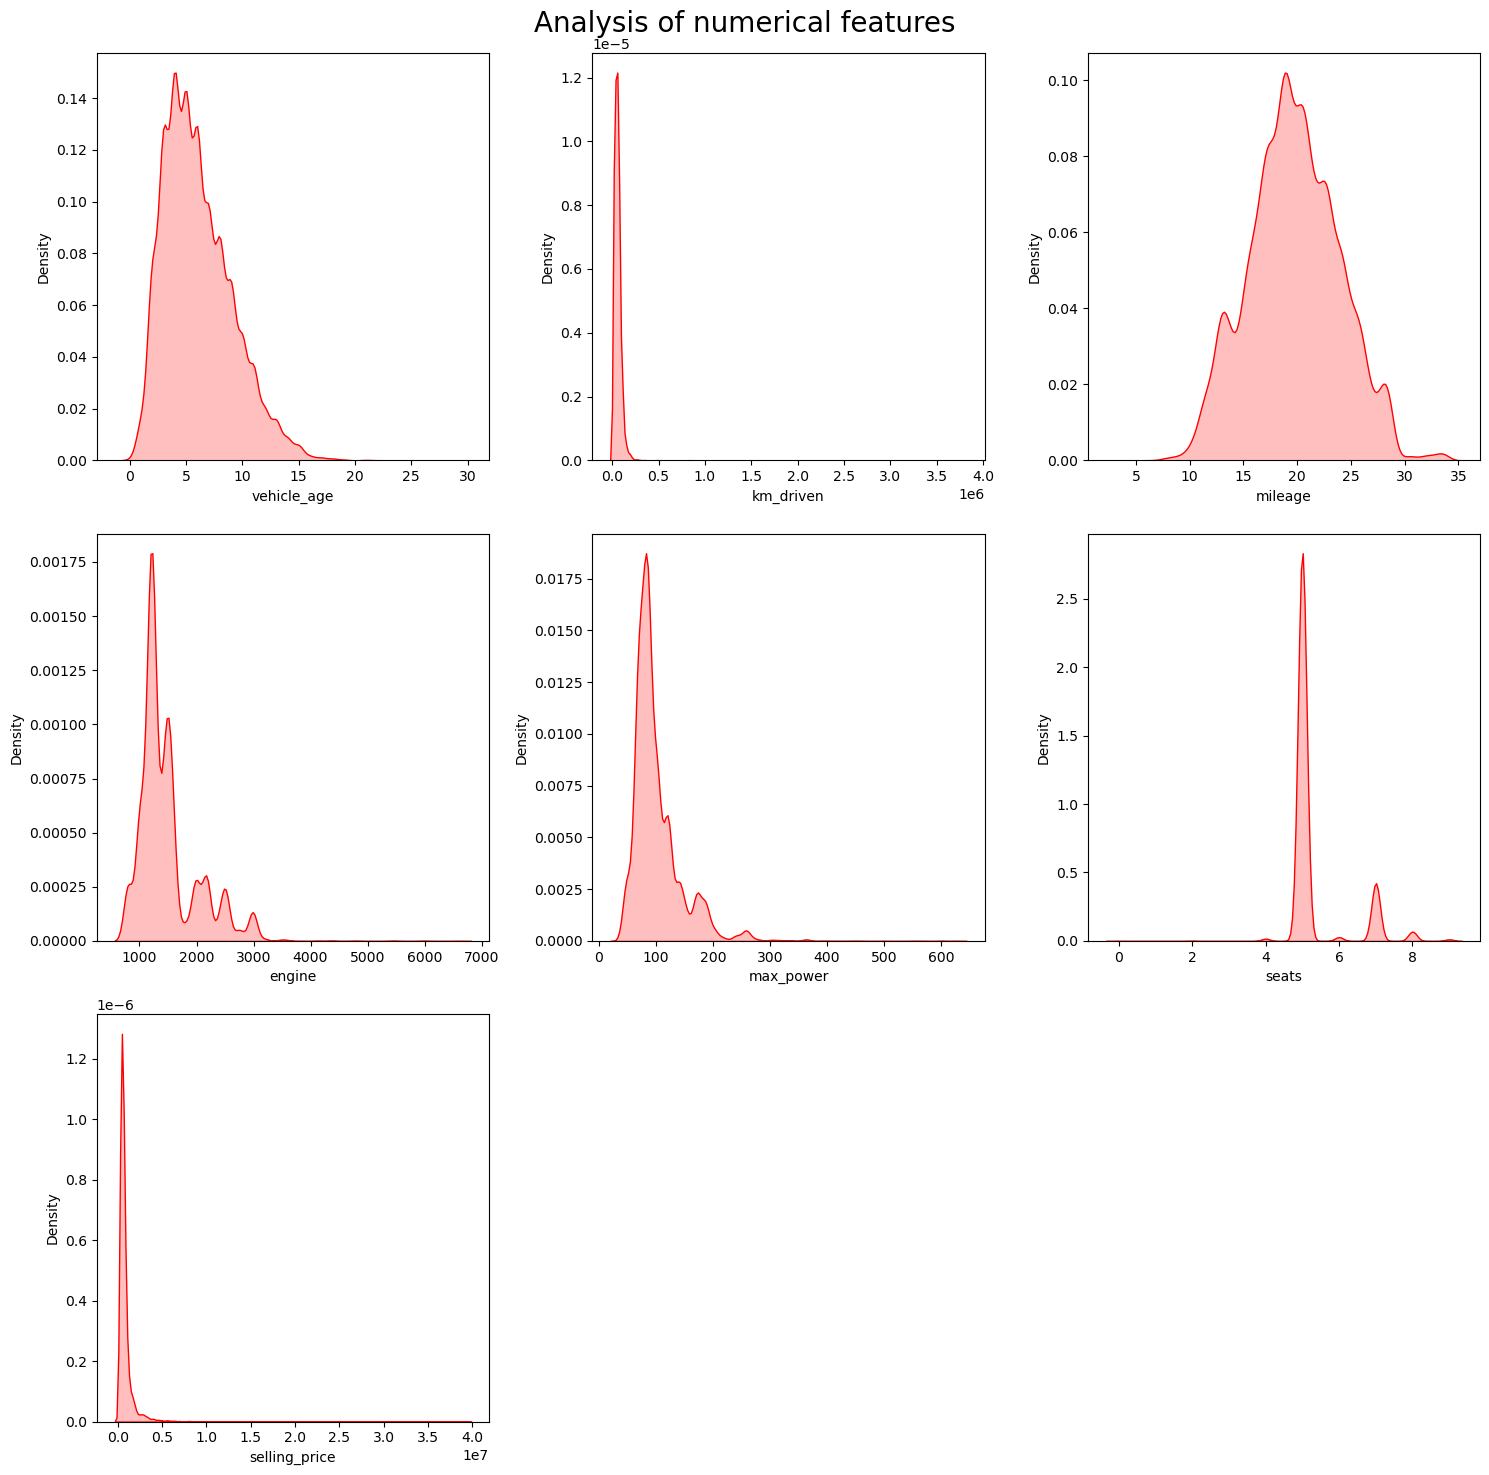

In [18]:
plt.figure(figsize=(15,15))
plt.suptitle('Analysis of numerical features',fontsize=20)
for i in range(0,len(num)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[num[i]],fill=True,color='r') #kernal density estimater plot :- used for creating a pdf function:- distribution of any numerical features
    plt.xlabel(num[i])
    plt.tight_layout()

Analysis : 

###### Km_driven , max_power , selling_price and engine are right skewed and positively skewed.
###### There are outliers in km_driven , engine and selling_price and max power

In [19]:
#Categorical features analysis 

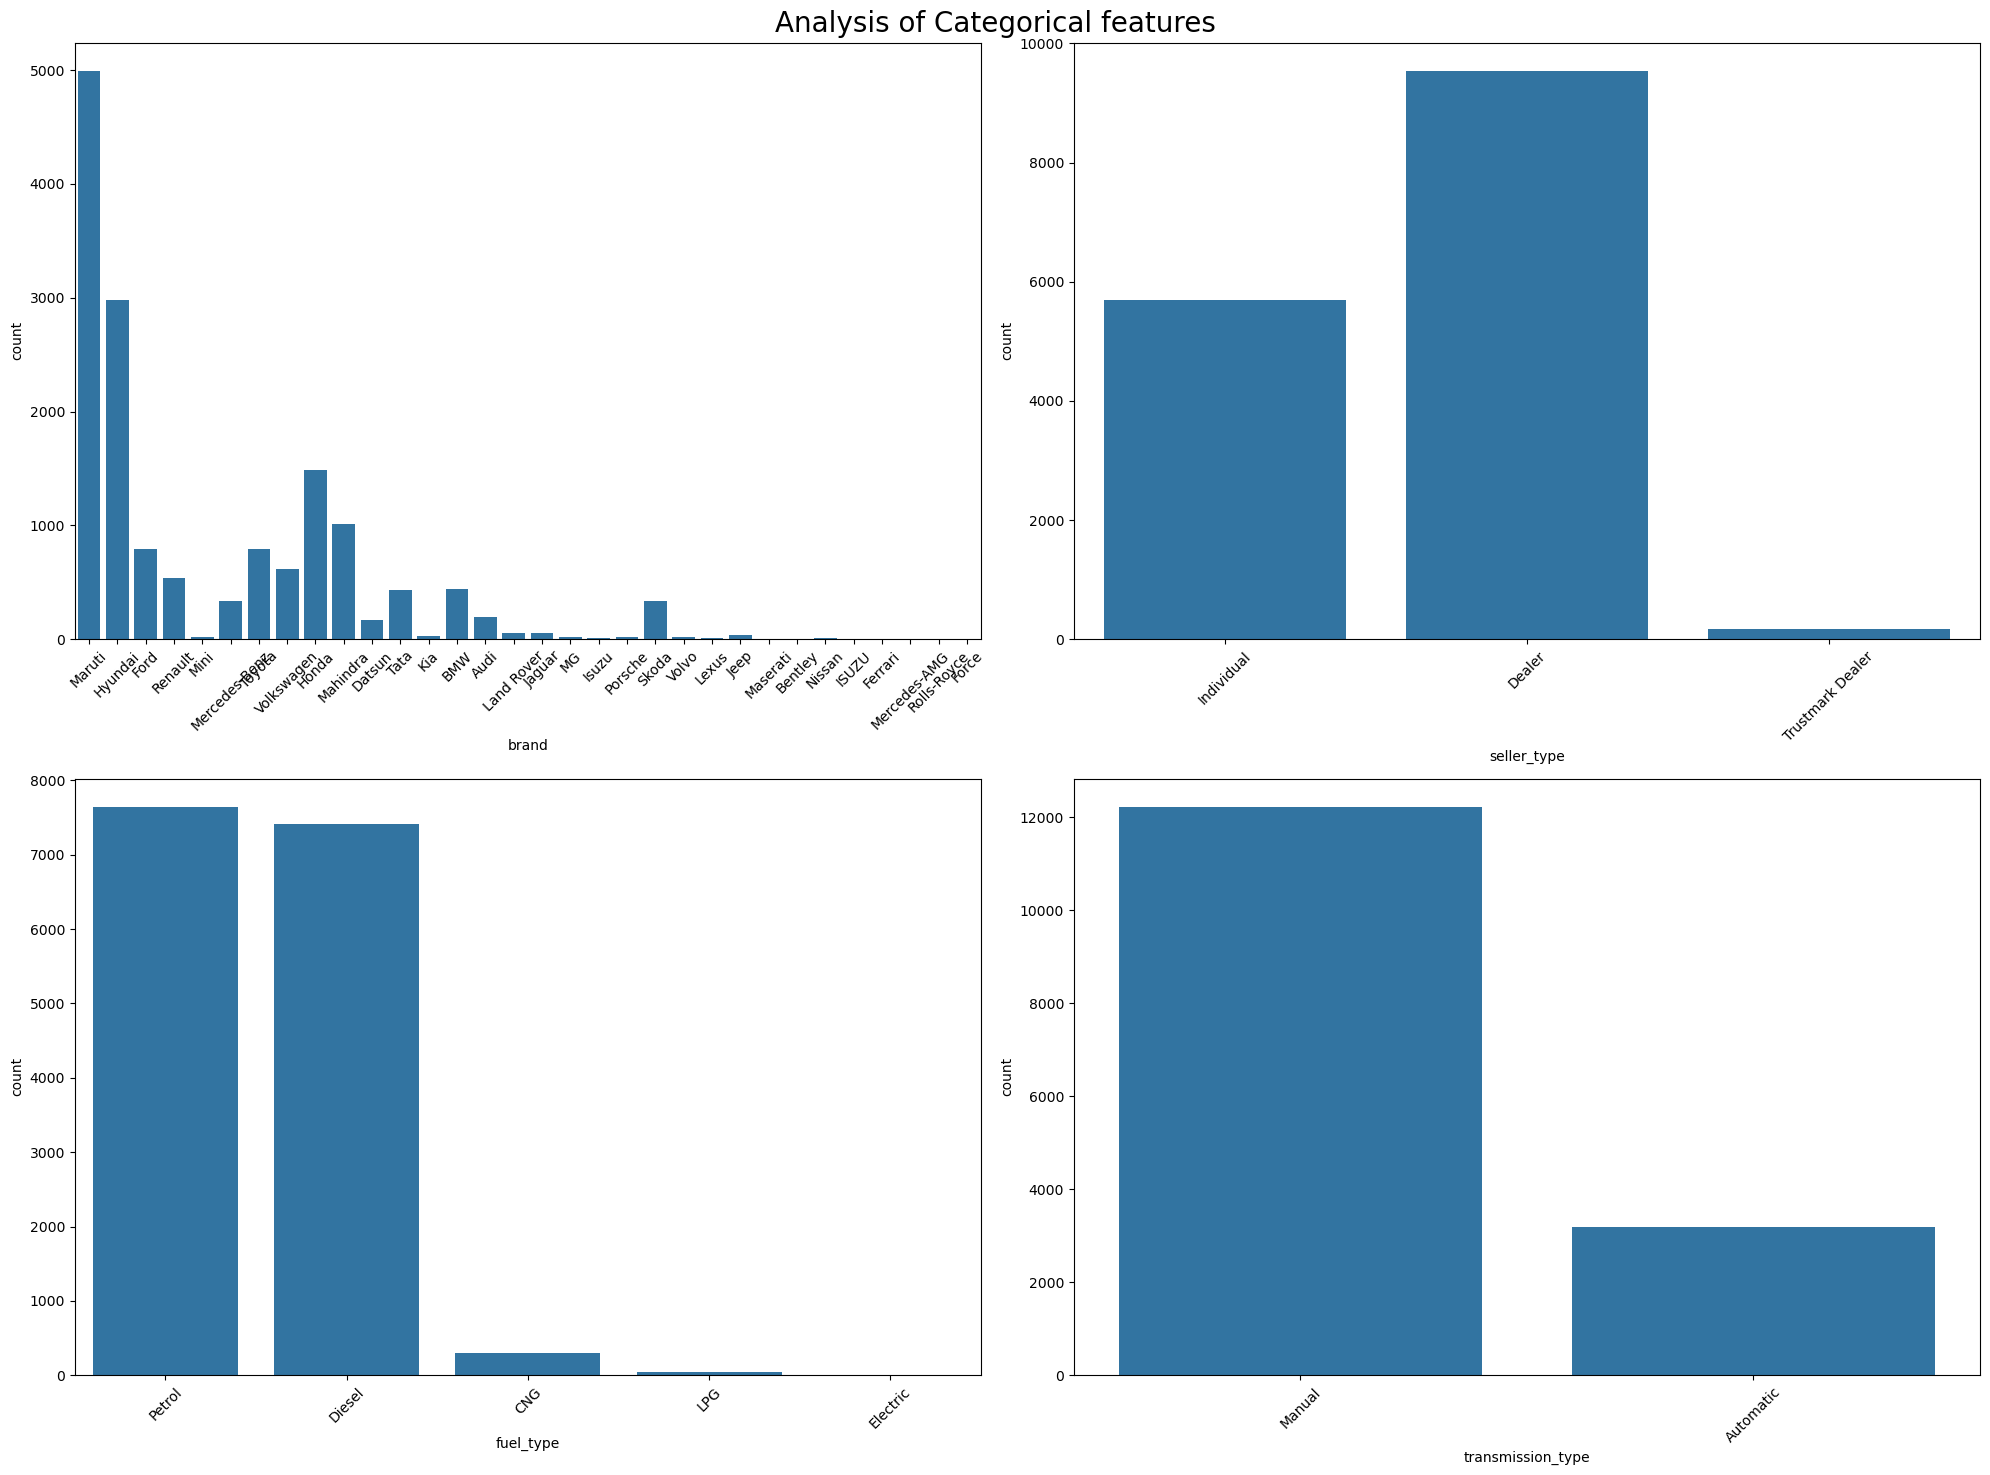

In [20]:
plt.figure(figsize=(20,15))
plt.suptitle('Analysis of Categorical features', fontsize=20)
cat1 = ['brand','seller_type','fuel_type','transmission_type']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [21]:
df[num].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


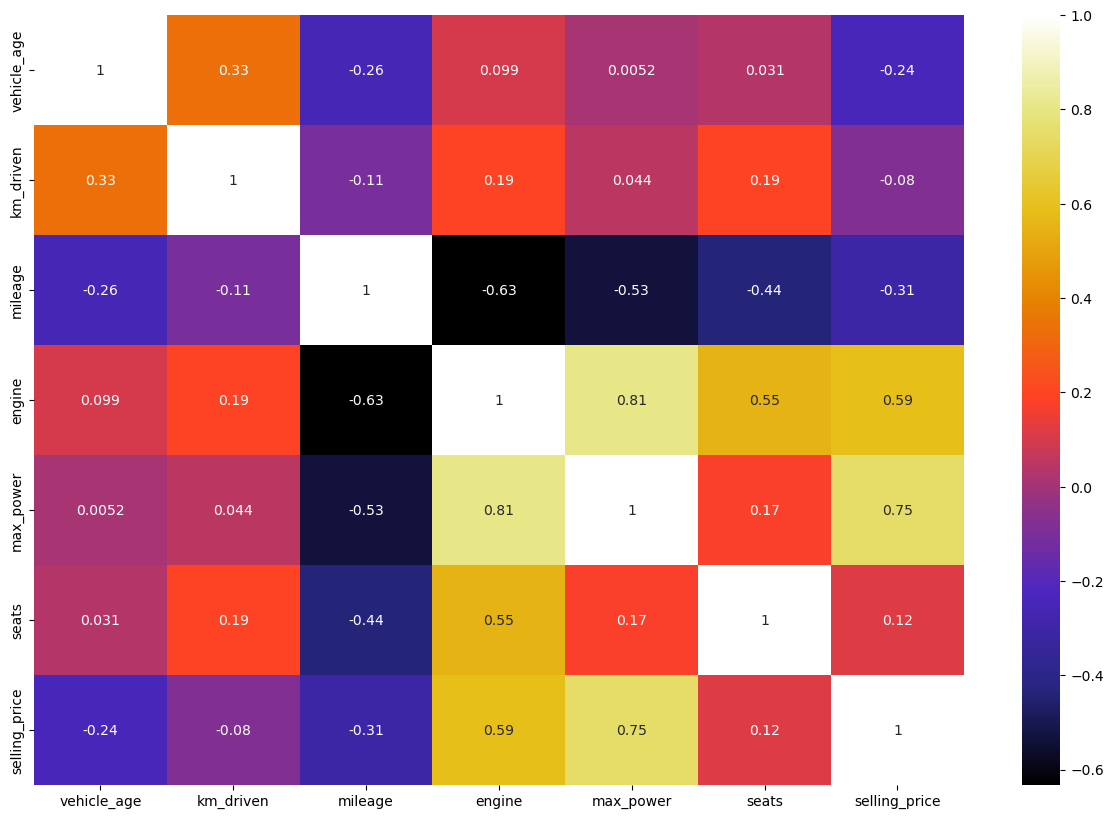

In [22]:
l=df[num].corr()
plt.figure(figsize = (15,10))
sns.heatmap(l,cmap='CMRmap',annot=True)
plt.show()

<Axes: ylabel='count'>

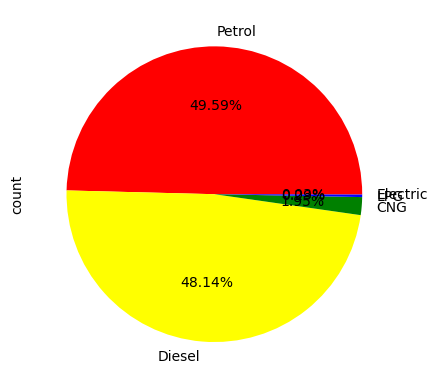

In [23]:
df.fuel_type.value_counts().plot(kind='pie',autopct ="%.2f%%",
                                 colors = ["red","yellow","green","blue"])

<Axes: ylabel='count'>

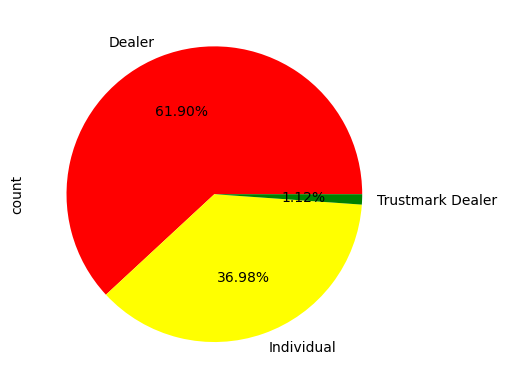

In [24]:
df.seller_type.value_counts().plot(kind='pie',autopct="%.2f%%",colors=['red','yellow','green','blue'])

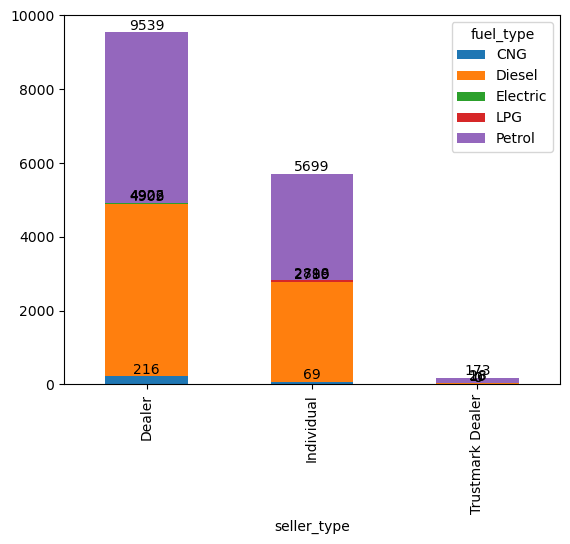

In [25]:
ax=pd.crosstab(df.seller_type,df.fuel_type).plot(kind="bar",stacked="True")
for i in ax.containers:
    ax.bar_label(i)

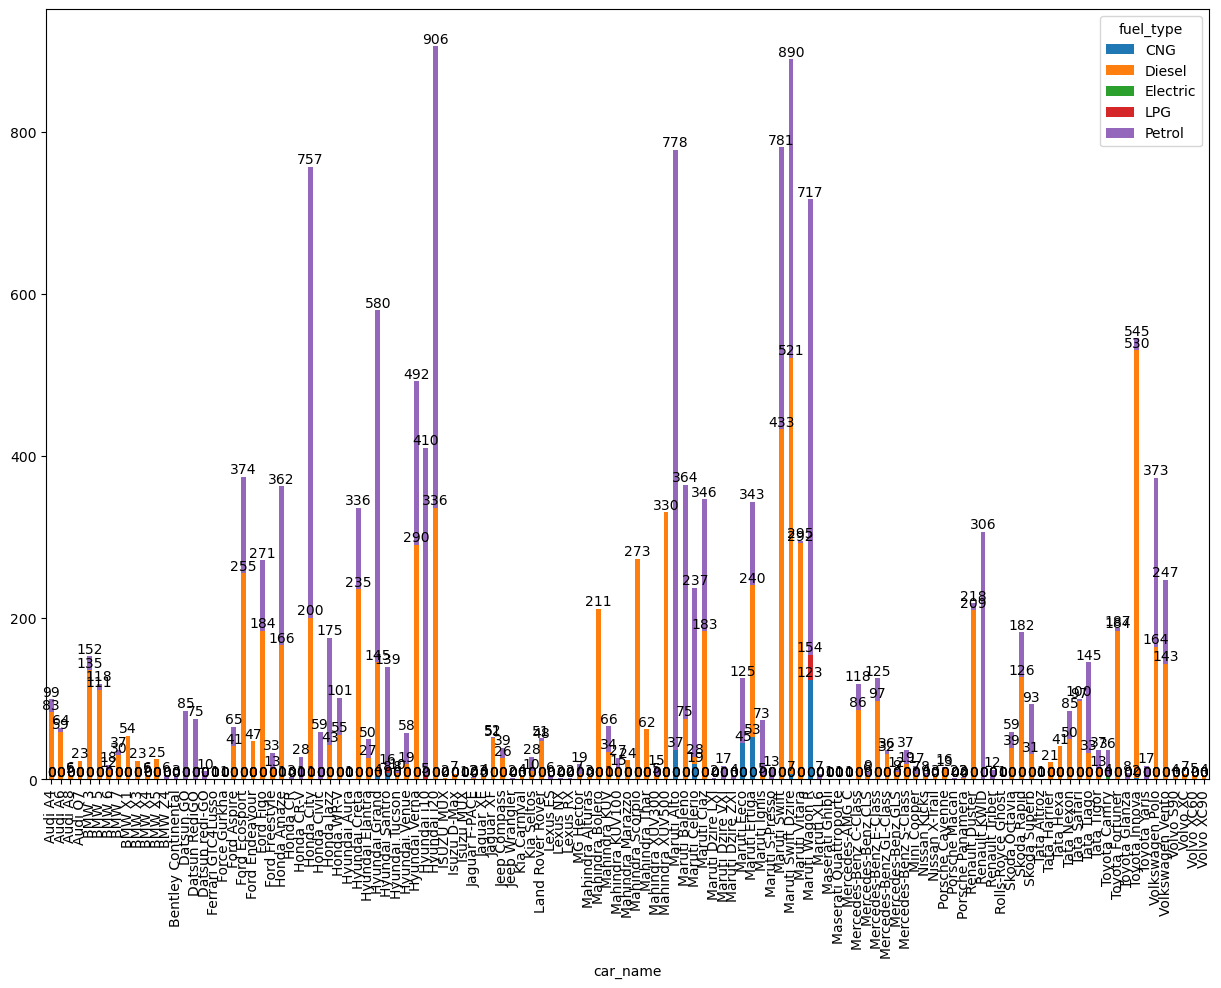

In [26]:
ax=pd.crosstab(df.car_name,df.fuel_type).plot(kind="bar",stacked="True",figsize=(15,10))
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='selling_price', ylabel='Density'>

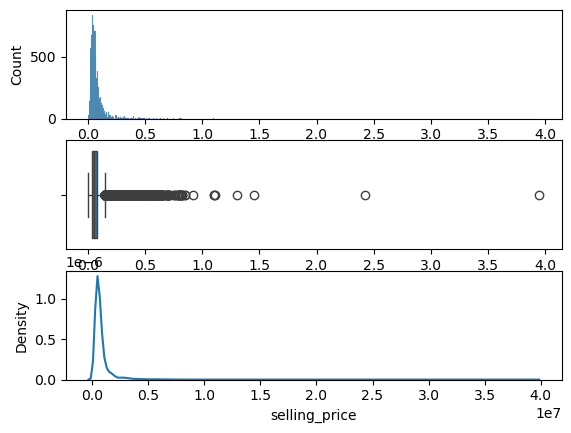

In [27]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.selling_price,ax=ax[0])
sns.boxplot(df.selling_price,ax=ax[1],orient="h")
sns.kdeplot(df.selling_price,ax=ax[2])

<Axes: xlabel='mileage', ylabel='Density'>

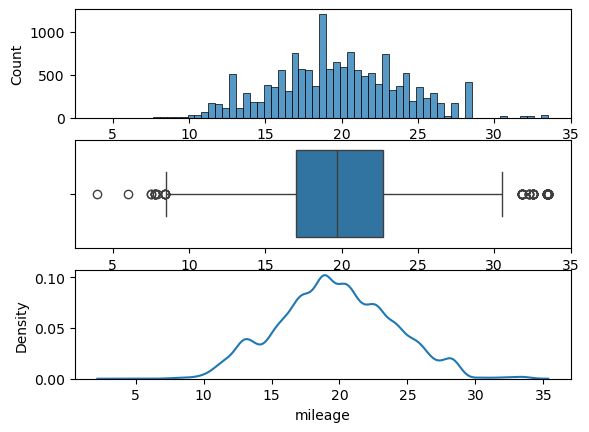

In [28]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.mileage,ax=ax[0])
sns.boxplot(df.mileage,ax=ax[1],orient="h")
sns.kdeplot(df.mileage,ax=ax[2])

<Axes: xlabel='km_driven', ylabel='Density'>

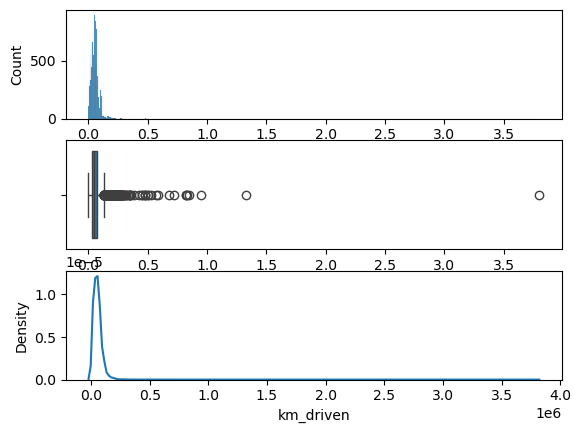

In [29]:
fig,ax=plt.subplots(3,1)
sns.histplot(df.km_driven,ax=ax[0])
sns.boxplot(df.km_driven,ax=ax[1],orient="h")
sns.kdeplot(df.km_driven,ax=ax[2])

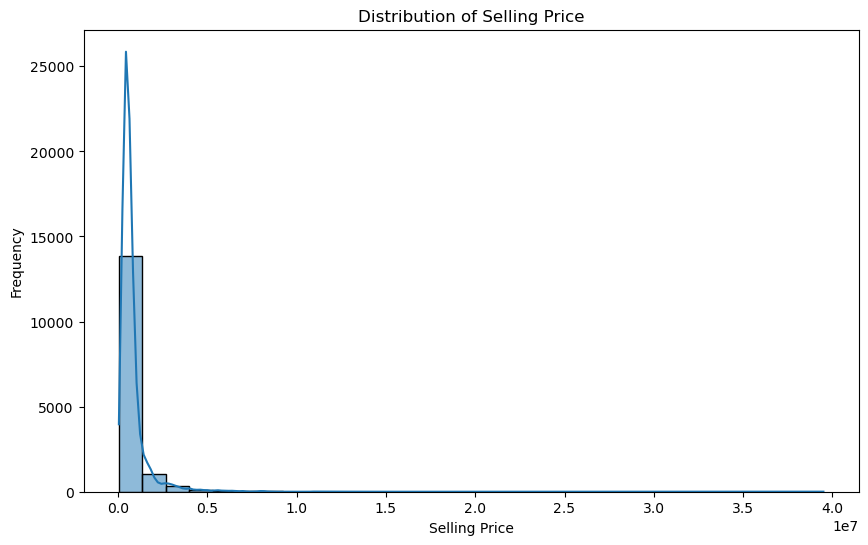

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

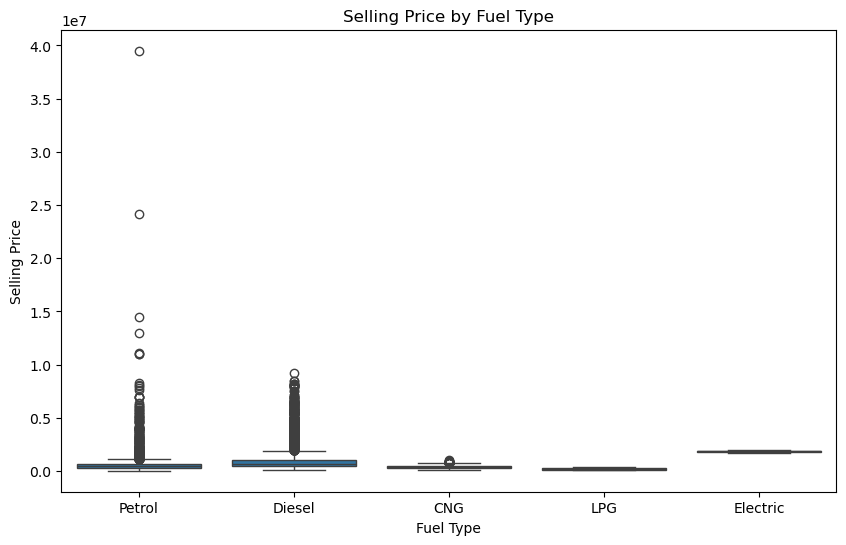

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

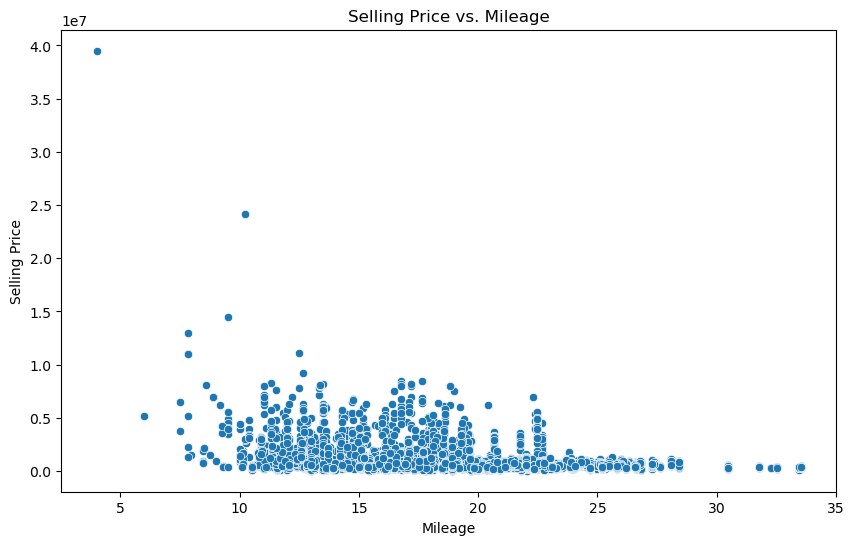

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='selling_price', data=df)
plt.title('Selling Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.show()

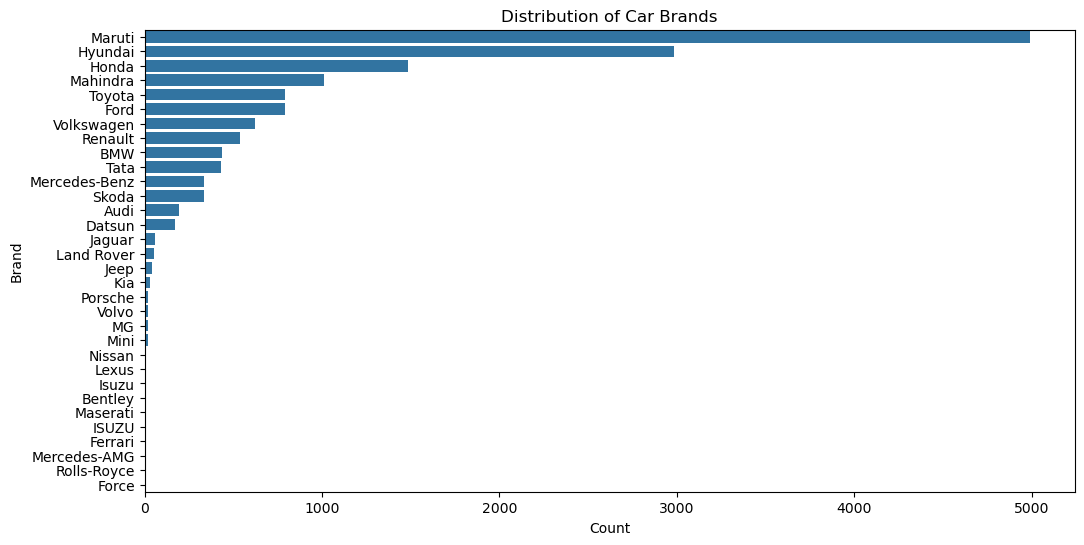

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=df, order=df['brand'].value_counts().index)
plt.title('Distribution of Car Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

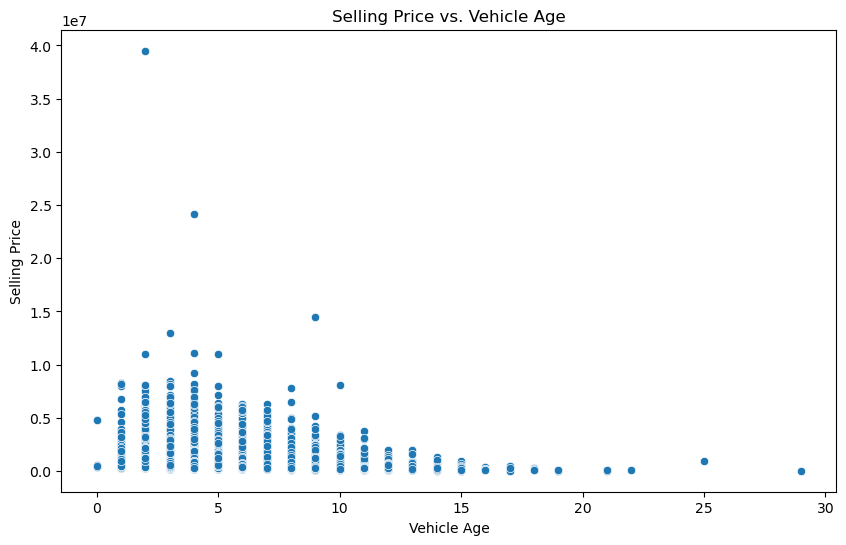

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle_age', y='selling_price', data=df)
plt.title('Selling Price vs. Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Selling Price')
plt.show()

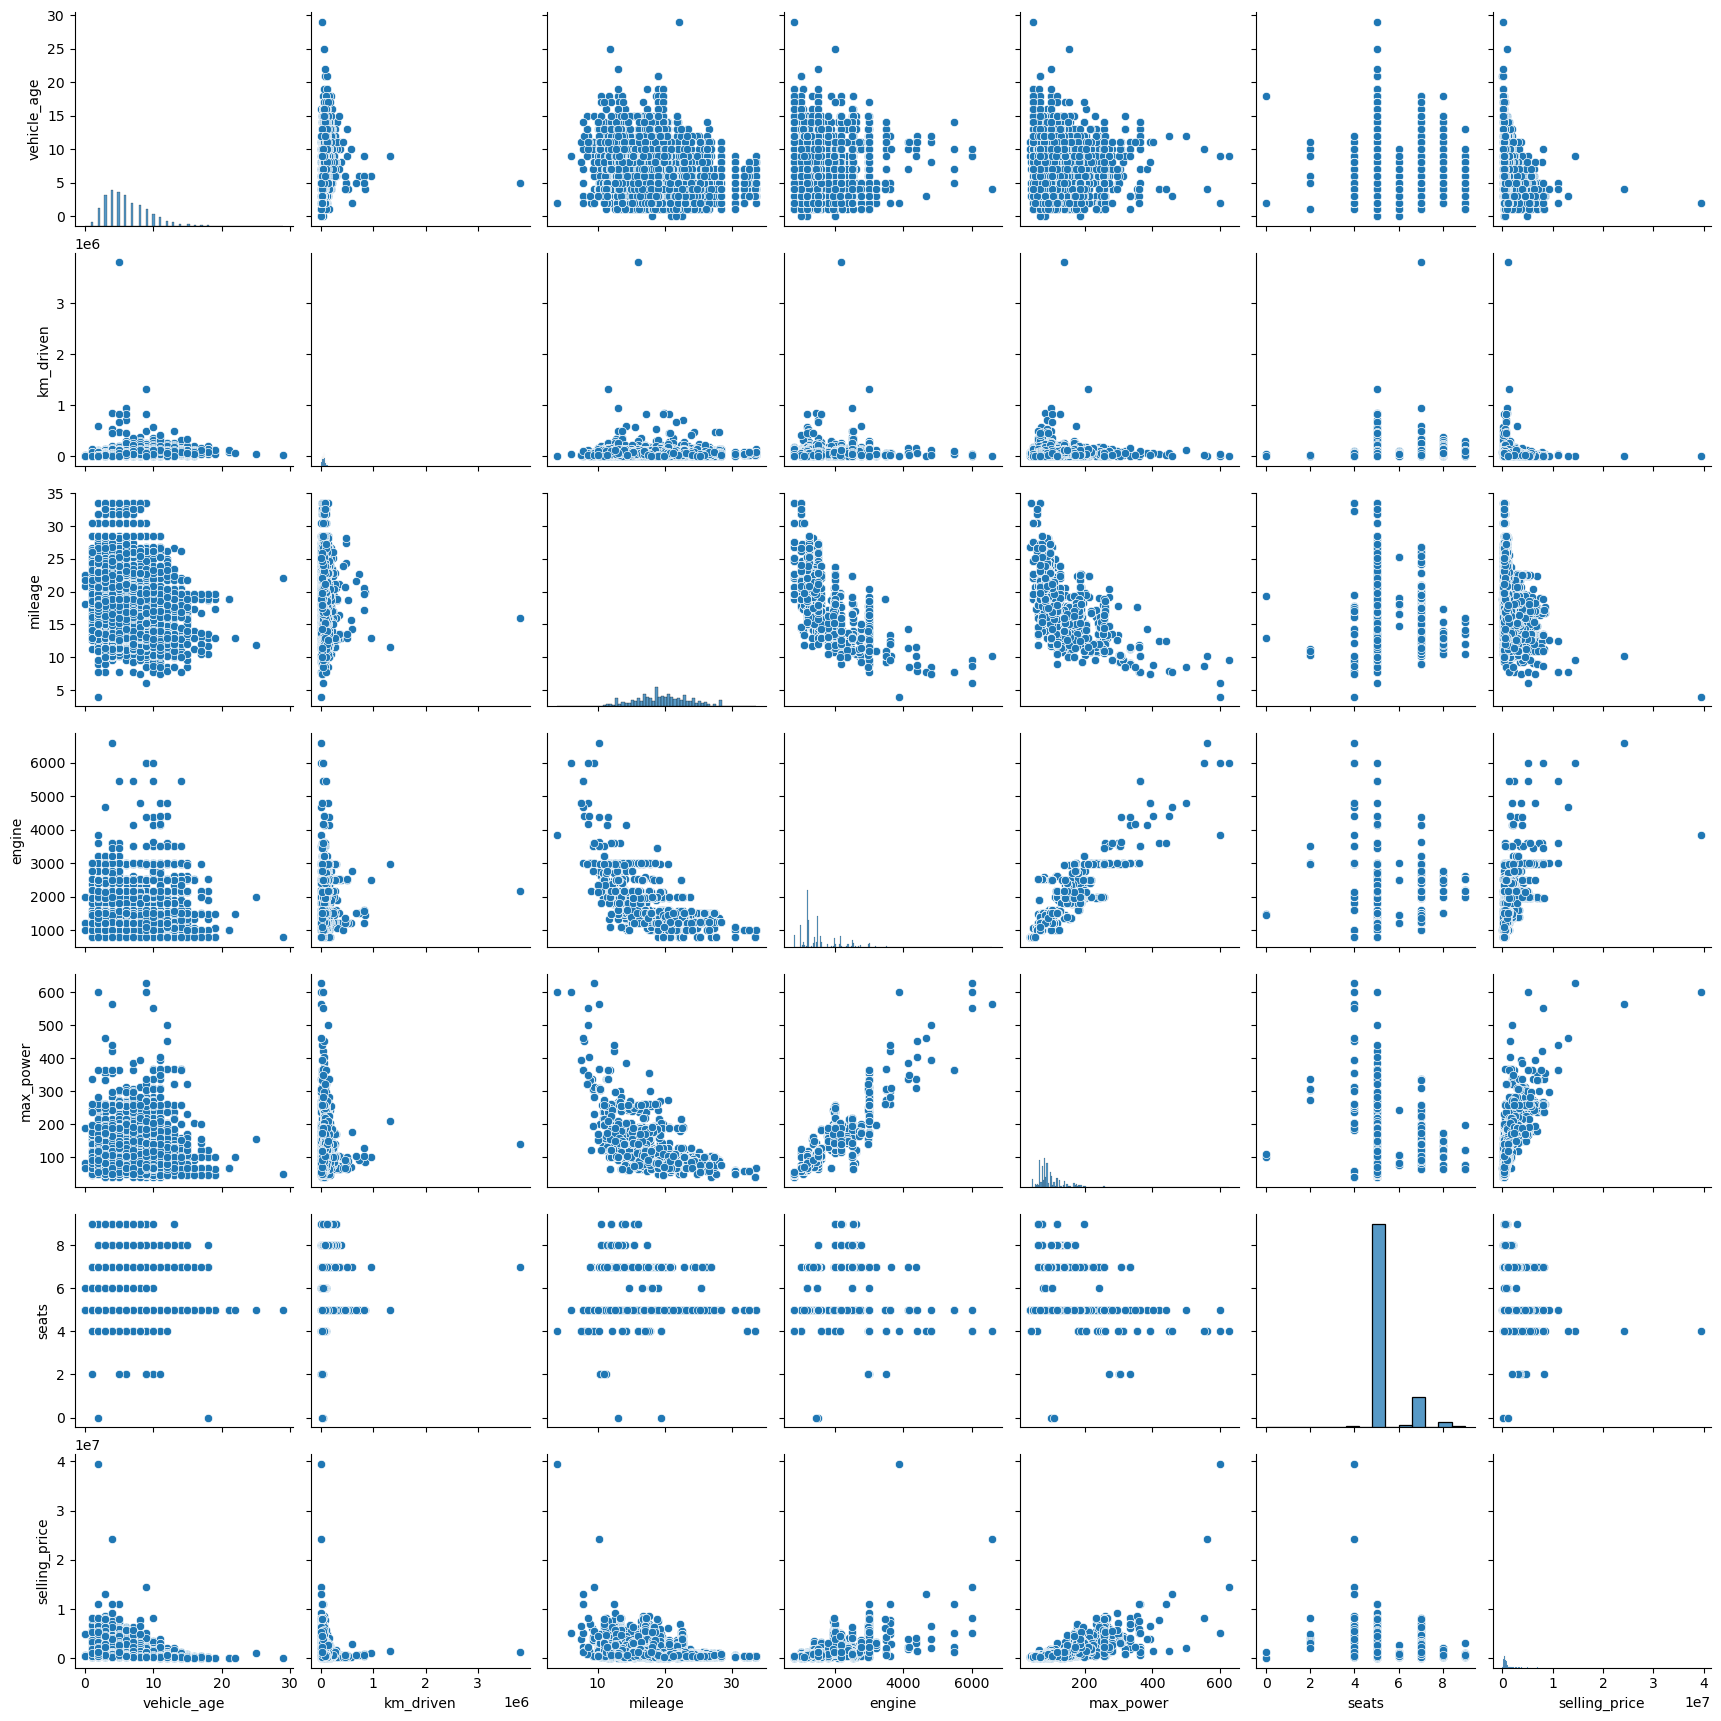

In [35]:
sns.pairplot(df[num])
plt.show()

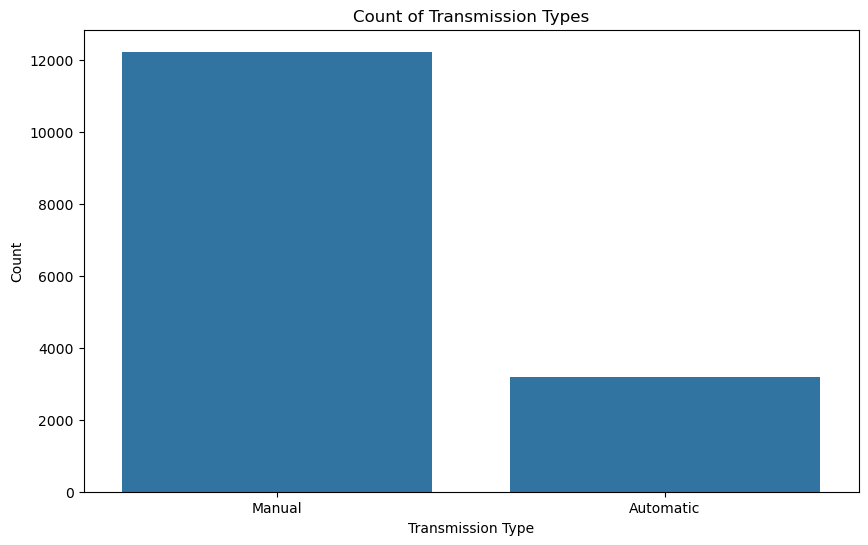

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission_type', data=df)
plt.title('Count of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

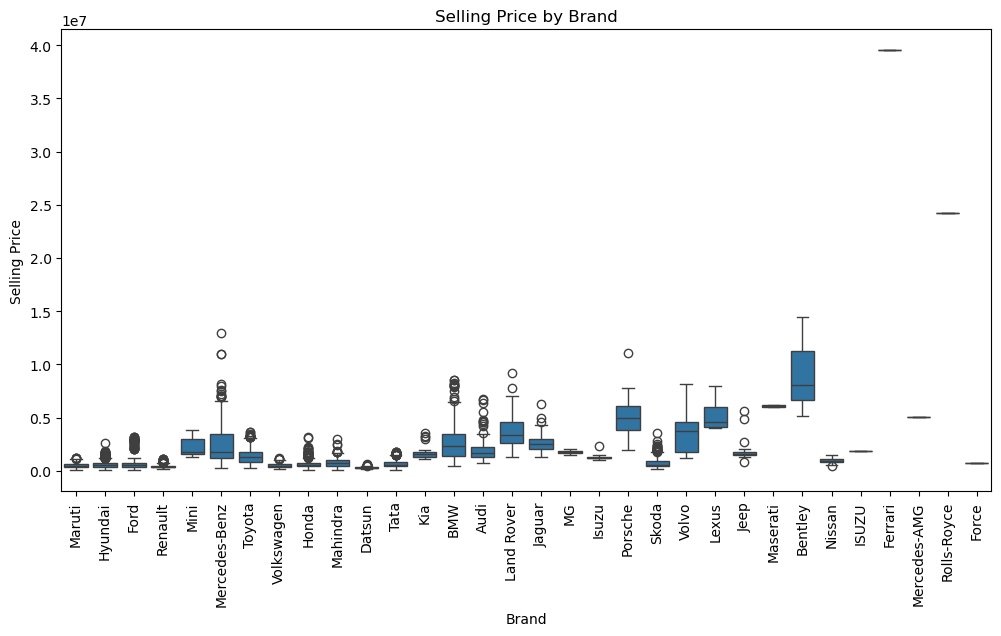

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='selling_price', data=df)
plt.title('Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

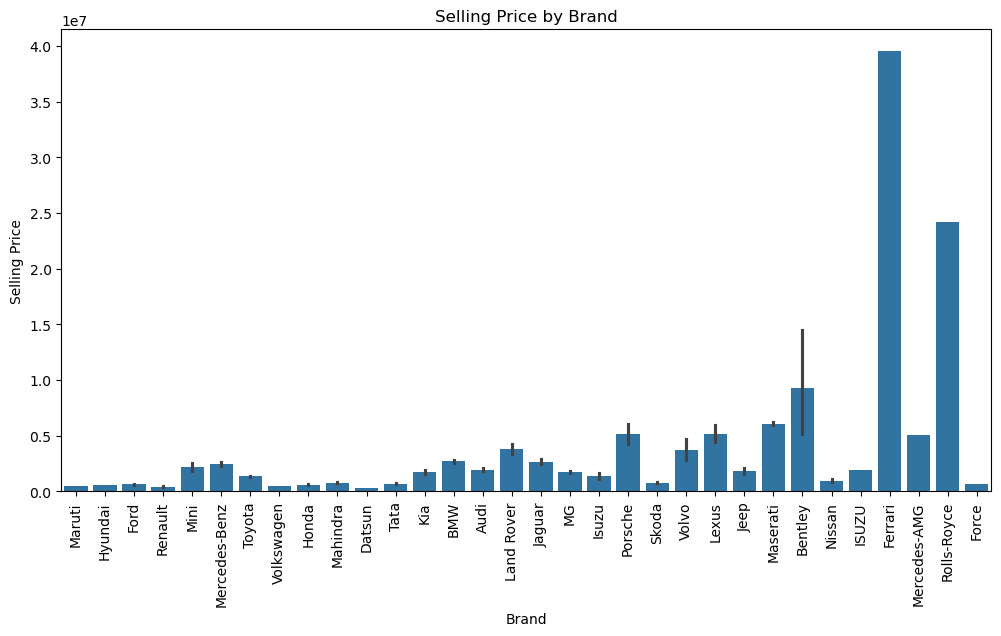

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='selling_price', data=df)
plt.title('Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

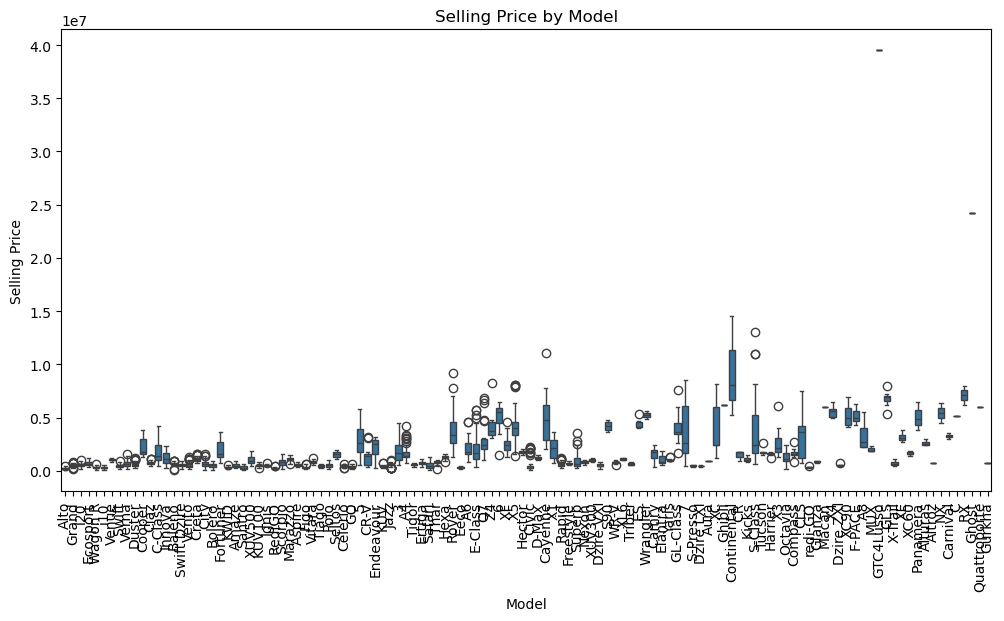

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='selling_price', data=df)
plt.title('Selling Price by Model')
plt.xlabel('Model')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

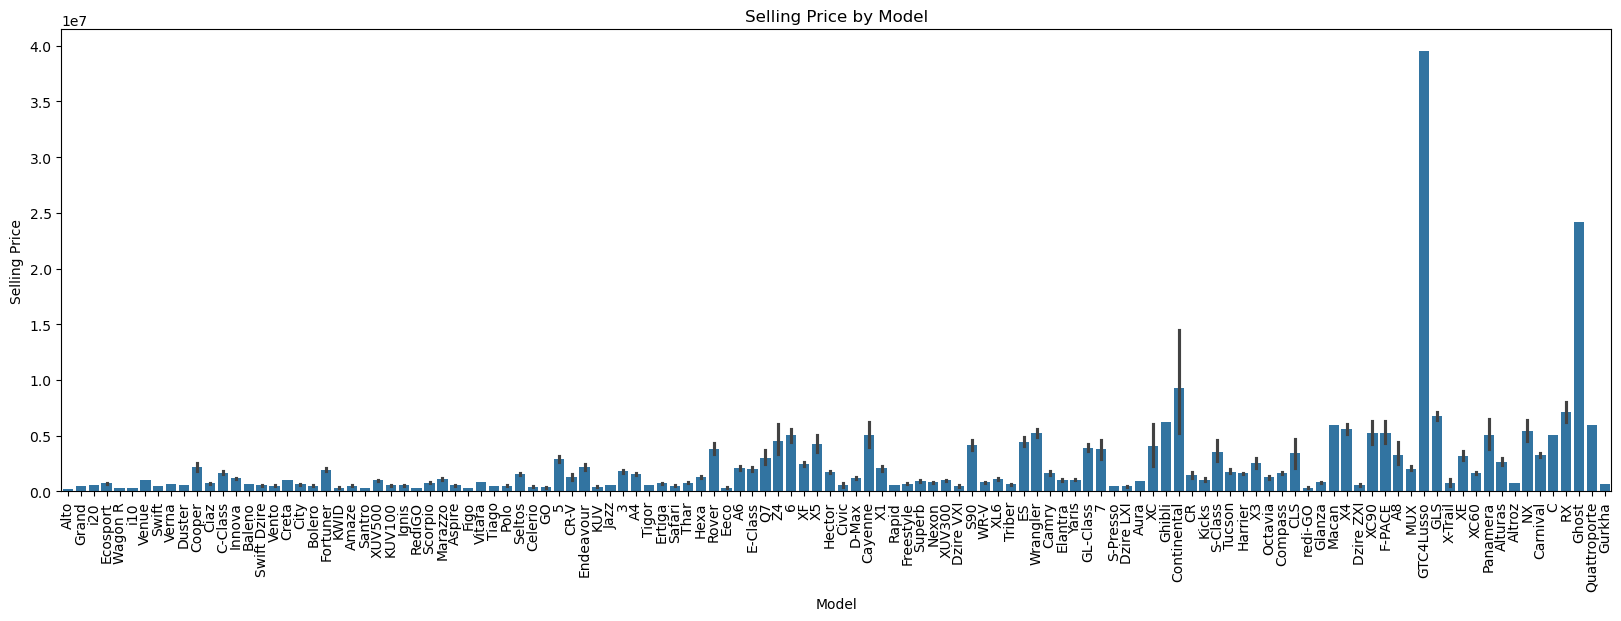

In [42]:
plt.figure(figsize=(20, 6))
sns.barplot(x='model', y='selling_price', data=df)
plt.title('Selling Price by Model')
plt.xlabel('Model')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

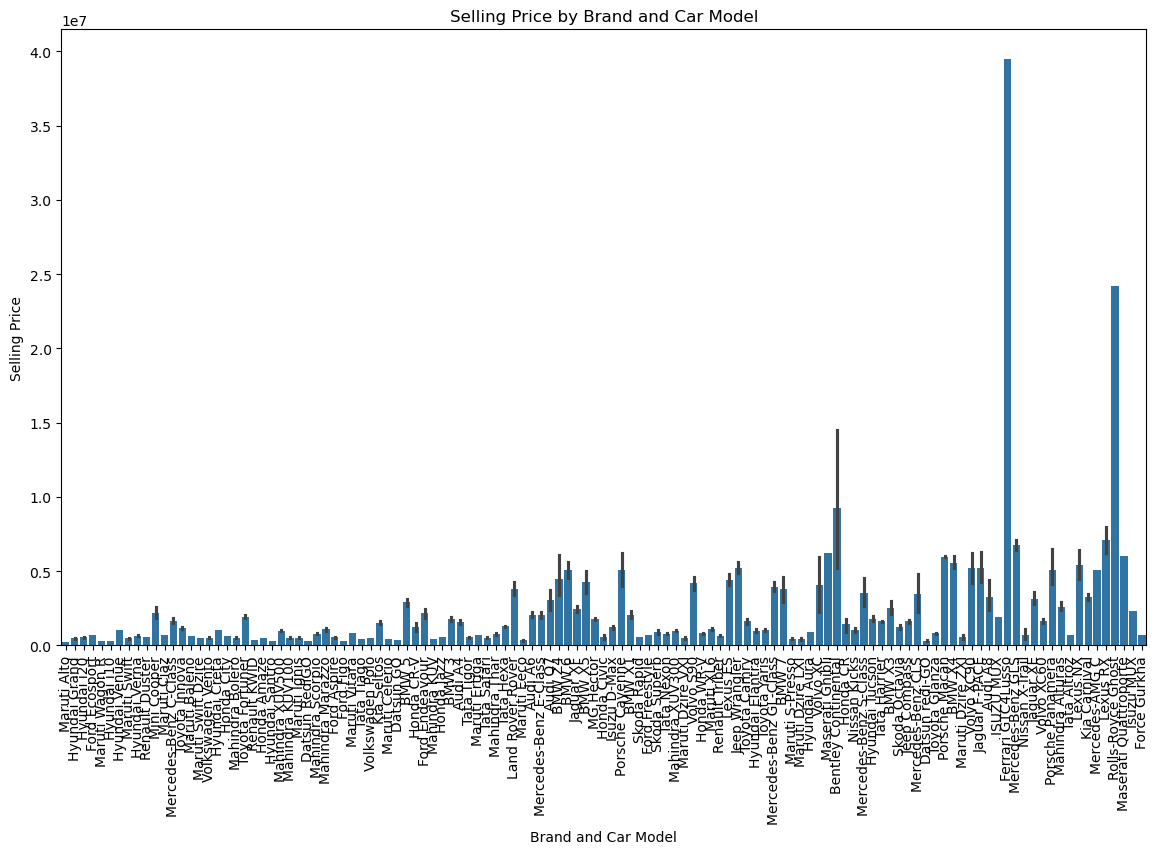

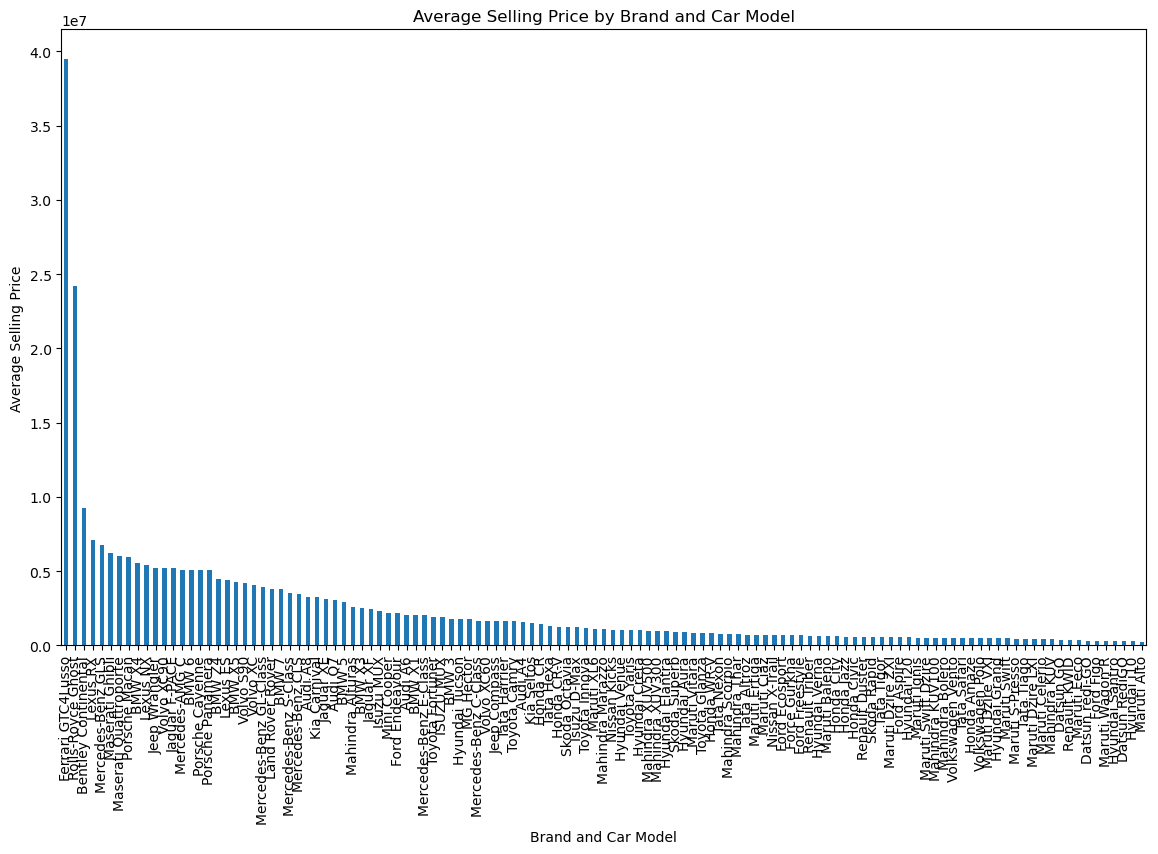

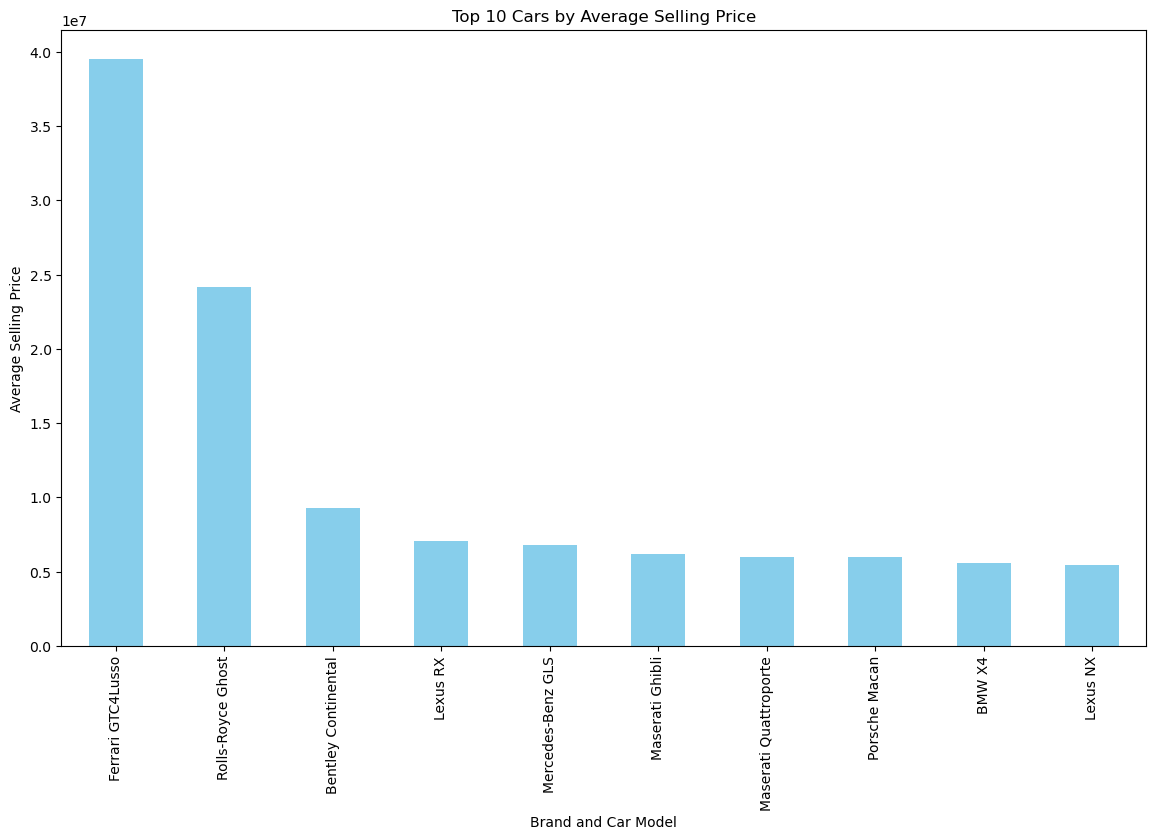

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df['brand_model'] = df['brand'] + ' ' + df['model']

#  Barplot of Selling Price by Brand and Car Model
plt.figure(figsize=(14, 8))
sns.barplot(x='brand_model', y='selling_price', data=df)
plt.title('Selling Price by Brand and Car Model')
plt.xlabel('Brand and Car Model')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

# Bar Plot of Average Selling Price by Brand and Car Model
avg_selling_price = df.groupby('brand_model')['selling_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
avg_selling_price.plot(kind='bar')
plt.title('Average Selling Price by Brand and Car Model')
plt.xlabel('Brand and Car Model')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()

# 3. Highlight the Top N Cars to Buy
top_n = 10
top_cars = avg_selling_price.head(top_n)
plt.figure(figsize=(14, 8))
top_cars.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Cars by Average Selling Price')
plt.xlabel('Brand and Car Model')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()
